# Задание 5
- Шеверев Сергей Вячеславович
- 22М-05ММ
- Вариант 3:
  1) Зависимая переменная - HR.1, группирующая переменная - headache.1
  2) Зависимая переменная - HR.1, группирующие переменные - headache.1 и sweating.1
  
  - Задача однородности в случае двух выборок: Проверим на предмет однородности независимых выборок метрическую переменную в зависимости от категориальной переменной по критериям Вилкоксона, Фишера равенства дисперсий и Стьюдента равенства средних. Приведем значеняи средних с ошибками среднего, медиан с интерквартильными размахом и значимости критериев.
  - Задача однородности в случае более двух выборок: проверим на предмет однородности данные метрической переменной в зависимости от факторовпо ритерию Краскела-Уоллиса, при помощи однофакторного дисперсионного анализа. Построим бокс-плот. Применим критерий Тьюки и критерий Стьюдента с поправкой Бонферони.
  - Выполним двухфакторный дисперсионный анализ для метрической переменной с двумя факторами.
  

In [21]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats


In [22]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

Считаем датасет:

In [23]:
df = pd.read_csv('data_big.csv')

In [24]:
len(df.keys())

121

В датасете 120 признаков, один из которых - это порядковый номер записи. Нам нужны наблюдения в первый день и только  качественные признаки. Поэтому отфильтруем ненужные.

In [25]:
df.head()

,Unnamed: 0,X.1,depressed.mood.1,anxiety.1,suspiciousness.1,irritability.1,craving.to.alcohol.1,weakness.1,insomia.1,headache.1,...,combined2.9,HR.9,SBP.9,DBP.9,MBP.9,SV.9,CO.9,SI.9,CI.9,TPR.9
0,1,1,1,1,0,1,1,1,1,0,...,0,68.0,108.0,70.0,83.0,74.0,5.0,40.0,2.7,1321.0
1,2,2,1,1,0,0,1,1,2,1,...,9,63.0,114.0,70.0,85.0,123.0,7.7,60.0,3.8,879.0
2,3,3,1,1,0,0,0,2,1,0,...,0,64.0,120.0,80.0,93.0,106.0,6.8,55.0,3.5,1098.0
3,4,4,2,2,0,0,0,2,0,0,...,0,56.0,124.0,90.0,101.0,90.0,5.1,43.0,2.4,1600.0
4,5,5,1,1,0,0,2,2,1,0,...,0,66.0,116.0,78.0,90.0,90.0,5.9,45.0,2.2,1228.0


In [26]:
df = df [df.keys()[2:]]

### Задача однородности в случае двух выборок

Имеется три градации признака головной боли в первый день (**headache.1**):

In [27]:
df['headache.1'].unique()

array([0, 1, 2])

In [28]:
df.groupby('headache.1')['HR.1'].count()

headache.1
0    21
1    11
2     2
Name: HR.1, dtype: int64

Наиболее представленной группой являются индивиды с признаком головной боли, равным 0. Объединим ячейки:

In [29]:
func = lambda x: 0 if x < 1 else 1
df['headache.1'] = df['headache.1'].apply(func)

headache0 = df[df['headache.1'] == 0]["HR.1"]
headache1 = df[df['headache.1'] == 1]["HR.1"]

#### Критерий Вилкоксона

In [30]:
#_, pvalue = scipy.stats.wilcoxon(df['headache.1'], df['HR.1'])
_, pvalue = scipy.stats.ranksums(headache0, headache1)
print(pvalue)

0.6450135373174171


По критерию Вилкоксона при уровне значимости 0.05 гипотеза об однородности выборок не может быть отвергнута

##### Критерий Фишера равенства дисперсий

In [31]:
def f_test(X, Y):
    df1 = len(X) - 1
    df2 = len(Y) - 1
    #F = X.var()/Y.var()
    #cause var = mean(x), where x = abs(a - a.mean())**2.
    S2x = X.var()*len(X)/(len(X)-1)
    S2y = Y.var()*len(Y)/(len(Y)-1)
    F = S2x/S2y
    print(S2x, S2y)
    p_value = scipy.stats.f.cdf(F, df1, df2)
    return (F, p_value)

In [32]:
_, pvalue = f_test(headache0, headache1)
print(pvalue)

345.605 384.5555555555555
0.40215136510914884


По критерию Фишера гипотеза о равенстве дисперсий не может быть отвегнута

#### Критерий Стьюдента равенства средних

In [33]:
_, pvalue = scipy.stats.ttest_ind(headache0, headache1)
print(headache0.mean(), headache1.mean())
print(pvalue)

82.38095238095238 80.84615384615384
0.814732319995233


По критерию стьюдента гипотеза о равенстве средних не может быть отвергнута

**Выводы об однородности двух выборок**: представленные выше критерии не позволяют отвергнуть гипотезу об однородности выборок

##### Средние с ошибками среднего, медианы с интерквартильным размахом

In [34]:
def params(X):
    mean = X.mean()
    SEM = np.sqrt(headache0.var())/np.sqrt(len(X))
    print(f'Среднее {mean}+-{SEM}')
    
    iqr = scipy.stats.iqr(X)
    median = X.median()
    print(f"Медиана {median} с интерквартилным размахом {iqr} ")

print('headache == 0')
params(headache0)
print('\n\nheadache == 1')
params(headache1)

headache == 0
Среднее 82.38095238095238+-3.959001912745777
Медиана 83.0 с интерквартилным размахом 17.0 


headache == 1
Среднее 80.84615384615384+-5.0318036149126115
Медиана 77.0 с интерквартилным размахом 18.0 


### Задача однородности в случае более двух выборок

Подготовим выборки:

In [35]:
df['sweating.1'].unique()

array([2, 1, 0])

In [36]:
sweating = [df[df[f'sweating.1'] == i]["HR.1"] for i in df['sweating.1'].unique()]

#### Критерий Краскела-Уоллиса

In [37]:
_, pvalue = scipy.stats.kruskal(*sweating)
print(pvalue)

0.19167580639762713



Гипотеза о равенстве медиан в выборках по критерию Краскела-Уоллиса  не может быть отвергнута.

#### Однофакторный дисперсионный анализ

In [38]:
_, pvalue = scipy.stats.f_oneway(*sweating)
print(pvalue)

0.08787033797293588


Гипотеза о том, что внутрегрупповые средние совпадают, не отвергается.

**Вывод**: Есть основания предполагать, что выборки распределены одинаково

#### Критерий Стьюдента для множественных сравнений с поправкой Бонферони

In [77]:

# поправка Бонферони
alpha = 0.05 / len(sweating)
print(f"Множественные сравнения: \n Поправка Бонферонни: {alpha}")
for i, si in enumerate(sweating):
    for j, sj in enumerate(sweating[i+1:]):
        _, pvalue = scipy.stats.ttest_ind(si, sj)
        if pvalue < alpha:
            print(f"\tВыборки {i+1} и {j+2+i} значимо различаются; pvalue = {pvalue} <= {alpha}")
        else: 
            print(f"\tВыборки {i+1} и {j+2+i} значимо не различаются; pvalue = {pvalue} > {alpha}")

Множественные сравнения: 
 Поправка Бонферонни: 0.016666666666666666
	Выборки 1 и 2 значимо не различаются; pvalue = 0.2141537013942736 > 0.016666666666666666
	Выборки 1 и 3 значимо не различаются; pvalue = 0.03904888251273177 > 0.016666666666666666
	Выборки 2 и 3 значимо не различаются; pvalue = 0.17285655990335377 > 0.016666666666666666


#### Критерий Тьюки

In [48]:
pvalue = scipy.stats.tukey_hsd(*sweating).pvalue
print('p-value table: \n',pvalue)
print()
for i, x in enumerate(pvalue):
    print(f'Группа {i+1}:')
    for k, y in enumerate(x):
        if i == k:
            continue
        print(f'\tс группой {k+1} ' + ('есть статистические значимые различия ' if y <=0.05 else 'нет статистически значимых различий') + f'; pvalue = {y}')
    

p-value table: 
 [[1.         0.50187212 0.07199212]
 [0.50187212 1.         0.28017433]
 [0.07199212 0.28017433 1.        ]]

Группа 1:
	с группой 2 нет статистически значимых различий; pvalue = 0.5018721169062217
	с группой 3 нет статистически значимых различий; pvalue = 0.0719921240760194
Группа 2:
	с группой 1 нет статистически значимых различий; pvalue = 0.5018721169062217
	с группой 3 нет статистически значимых различий; pvalue = 0.2801743292743646
Группа 3:
	с группой 1 нет статистически значимых различий; pvalue = 0.0719921240760194
	с группой 2 нет статистически значимых различий; pvalue = 0.2801743292743646


Видим, что согласно тесту Тьюки выборки между собой не различаются

### Построим бокс-плот

In [148]:
import seaborn 

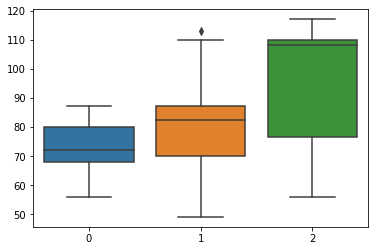

In [151]:
seaborn.boxplot(sweating)
plt.show()

### Двухфакторый дисперсионный анализ

In [136]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm, AnovaRM

##### Classical ANOVA c **фиксированными** эффектами:
 - эффект фактора `sweating`
 - эффект фактора `headache`
 - эффект взаимодействия `sweating` и `headache`
 - $\texttt{'HR ~ C(sweating) + C(headache) + C(sweating):C(headache)'} $

In [130]:
data = pd.DataFrame({'headache':df['headache.1'], 'sweating':df['sweating.1'], 'HR':df['HR.1']})
#"HR ~ C(sweating)*C(headache)"" also works
model = ols('HR ~ C(sweating) + C(headache) + C(sweating):C(headache)', data=data).fit()
fixed_effects  = sm.stats.anova_lm(model, typ=2)
fixed_effects['PR(>F)']

C(sweating)                0.087321
C(headache)                0.995830
C(sweating):C(headache)    0.173080
Residual                        NaN
Name: PR(>F), dtype: float64

Значимость всех эффектов больше 0.05, что говорит о том, что эффекты факторов по отдельности и по взаимодействию не имеют значимого различия с зависимой переменной

##### Classical ANOVA cо **случайными** эффектами:

Для моделей со случайными эффектами значимость по эффекту взаимодействия (**C(sweating):C(headache)**) остается той же, что и в модели с фиксированными эффектами, а значимость по группам считается по отношениям к сумме квадратов, связанной с эффектом взаимодействия:

In [131]:

for i in ['C(sweating)', 'C(headache)']:
    F =  fixed_effects['sum_sq'][i]/fixed_effects['sum_sq']['C(sweating):C(headache)']
    fixed_effects['PR(>F)'][i] = 1 - scipy.stats.f.cdf(F, fixed_effects['df'][i], fixed_effects['df']['C(sweating):C(headache)'])

fixed_effects['PR(>F)']


C(sweating)                0.412318
C(headache)                0.998071
C(sweating):C(headache)    0.173080
Residual                        NaN
Name: PR(>F), dtype: float64

В модели со случайными эффектами заметно увеличилась значимость  эффекта фактора **sweating**: с 0.087321 до 0.412318, влияние фактора **headache** незначительно увеличилось